In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Simulate points with noise
def simulate_points(a, b, max_noise):
    x = np.linspace(-3, 3, 20)
    y = a + b * x 
    y_noise = np.random.uniform(-max_noise, max_noise, 20)
    y += y_noise
    
    return (x, y)

In [3]:
(x, y) = simulate_points(3, 5, 4)

In [4]:
# Initialize placeholders(data)
x_placeholder = tf.placeholder(tf.float32, [None], name = "x")
y_placeholder = tf.placeholder(tf.float32, [None], name = "y")

In [5]:
# Initialize variables(model hyperparameters)
a = tf.Variable(tf.truncated_normal([]), name = "a")
b = tf.Variable(tf.constant(0, dtype = tf.float32), name = "b")

In [6]:
# Initialize model and cost functions
y_hat = tf.multiply(a, x_placeholder) + b # y = a * x + b
error = tf.reduce_mean(tf.square(y_hat - y_placeholder), name = "MSE")

In [7]:
train = tf.train.GradientDescentOptimizer(0.05).minimize(error)
init = tf.global_variables_initializer()

In [8]:
# Run a session
sess = tf.Session()
sess.run(init)
x_test = np.array([-5.0, 0.0, 5.0])
test_dict = { x_placeholder: x_test }
snapshots = []

for i in range(50):
    feed_dict = {
        x_placeholder: x, # from our sample generating function
        y_placeholder: y # from our sample generating function
    }

    err, _ = sess.run([error, train], feed_dict = feed_dict)
    if i in [0, 1, 4, 10, 49]: # Steps we're interested in
        y_test = sess.run(y_hat, feed_dict = test_dict)
        snapshots.append((i, y_test))

    print str(i) + ":\tMSE: %.3f" % err

0:	MSE: 69.850
1:	MSE: 34.589
2:	MSE: 18.605
3:	MSE: 11.278
4:	MSE: 7.853
5:	MSE: 6.201
6:	MSE: 5.363
7:	MSE: 4.909
8:	MSE: 4.641
9:	MSE: 4.469
10:	MSE: 4.350
11:	MSE: 4.262
12:	MSE: 4.194
13:	MSE: 4.142
14:	MSE: 4.100
15:	MSE: 4.066
16:	MSE: 4.039
17:	MSE: 4.017
18:	MSE: 4.000
19:	MSE: 3.986
20:	MSE: 3.974
21:	MSE: 3.965
22:	MSE: 3.957
23:	MSE: 3.951
24:	MSE: 3.946
25:	MSE: 3.942
26:	MSE: 3.939
27:	MSE: 3.936
28:	MSE: 3.934
29:	MSE: 3.932
30:	MSE: 3.931
31:	MSE: 3.930
32:	MSE: 3.929
33:	MSE: 3.928
34:	MSE: 3.927
35:	MSE: 3.927
36:	MSE: 3.926
37:	MSE: 3.926
38:	MSE: 3.926
39:	MSE: 3.926
40:	MSE: 3.925
41:	MSE: 3.925
42:	MSE: 3.925
43:	MSE: 3.925
44:	MSE: 3.925
45:	MSE: 3.925
46:	MSE: 3.925
47:	MSE: 3.925
48:	MSE: 3.925
49:	MSE: 3.925


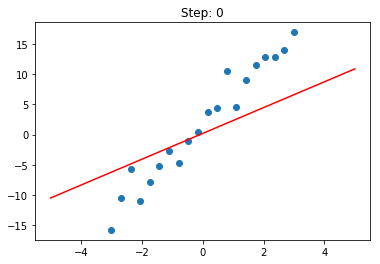

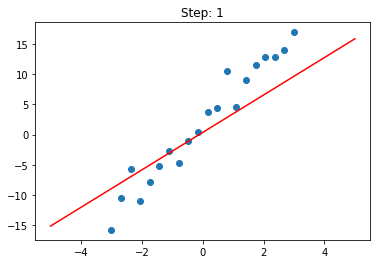

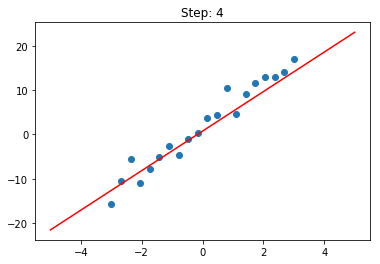

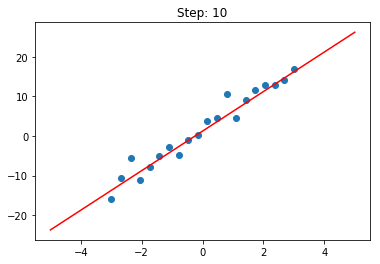

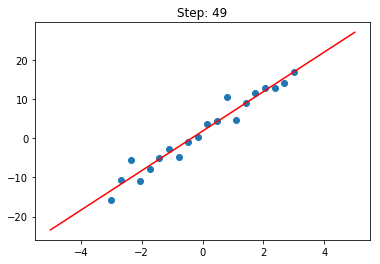

In [9]:
# Plot snapshots
for i, pair in enumerate(snapshots):
    step, y_test = pair
    plt.figure(i)
    plt.title("Step: " + str(step))
    plt.scatter(x, y)
    plt.plot(x_test, y_test, c = "red")

plt.show()